In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우용


## 📋 미션 1: A/B 테스트 신뢰구간 분석 🧪

### 🎯 학습 목표

지금까지 배운 모든 개념을 종합하여 실제 비즈니스 문제에 적용해보기

### 📖 배경 스토리

여러분은 온라인 쇼핑몰의 데이터 분석가입니다! 🛒

- **기존 웹사이트(A)**: 파란색 구매 버튼
- **새로운 웹사이트(B)**: 빨간색 구매 버튼

경영진이 묻습니다: "빨간색 버튼이 정말 더 좋은가요? 확실한 증거가 있나요?" 📊

In [3]:
# A/B 테스트 데이터 생성
np.random.seed(404)

# A그룹 (기존 디자인): 전환율 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a)

# B그룹 (새 디자인): 전환율 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# 데이터프레임 생성
ab_test_data = pd.DataFrame({
    'group': ['A']*n_a + ['B']*n_b,
    'user_id': range(1, n_a + n_b + 1),
    'converted': np.concatenate([conversions_a, conversions_b])
})

print("🧪 A/B 테스트 데이터")
print(f"A그룹 사용자 수: {n_a}명")
print(f"B그룹 사용자 수: {n_b}명")
print("\n그룹별 전환율:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['총_사용자수', '전환_사용자수', '전환율']
print(conversion_summary)


🧪 A/B 테스트 데이터
A그룹 사용자 수: 500명
B그룹 사용자 수: 500명

그룹별 전환율:
       총_사용자수  전환_사용자수    전환율
group                        
A         500       60  0.120
B         500       56  0.112


### ✅ **문제 1-1: 기본 통계량 계산하기** 🎯

**🤔 해야할 일:** A그룹과 B그룹의 전환율과 표준오차를 계산해보세요.

In [4]:

# TODO: p_a 계산하기 (A그룹 전환율)

p_a = conversions_a.mean()

# TODO: p_b 계산하기 (B그룹 전환율)
p_b = conversions_b.mean()

# TODO: A그룹 표준오차 계산하기
# 힌트: 비율의 표준오차 공식은 sqrt(p(1-p)/n)
se_a = np.sqrt(p_a*(1-p_a)/n_a)

# TODO: B그룹 표준오차 계산하기
se_b = np.sqrt(p_b*(1-p_b)/n_b)

print(f"A그룹 전환율: {p_a:.3f} ± {se_a:.3f}")
print(f"B그룹 전환율: {p_b:.3f} ± {se_b:.3f}")


A그룹 전환율: 0.120 ± 0.015
B그룹 전환율: 0.112 ± 0.014


### ✅ **문제 1-2: A그룹 신뢰구간 계산하기** 🎯

**🤔 해야할 일:** A그룹의 95% 신뢰구간을 계산해보세요.

In [5]:
# TODO: 95% 신뢰구간용 z값 설정

z_score = 1.96 # 1.96을 사용하세요

# TODO: A그룹 신뢰구간 하한 계산
ci_a_lower = p_a - z_score * se_a

# TODO: A그룹 신뢰구간 상한 계산
ci_a_upper = p_a + z_score * se_a

print(f"A그룹 95% 신뢰구간: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")


A그룹 95% 신뢰구간: [0.092, 0.148]


### ✅ **문제 1-3: B그룹 신뢰구간 계산하기** 🎯

**🤔 해야할 일:** B그룹의 95% 신뢰구간을 계산해보세요.

In [6]:
# TODO: B그룹 신뢰구간 하한 계산
ci_b_lower = p_b - z_score * se_b

# TODO: B그룹 신뢰구간 상한 계산
ci_b_upper = p_b + z_score * se_b

print(f"B그룹 95% 신뢰구간: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")


B그룹 95% 신뢰구간: [0.084, 0.140]


### ✅ **문제 1-4: 그룹별 신뢰구간 시각화하기** 📊

**🤔 해야할 일:** 막대그래프로 두 그룹의 전환율과 신뢰구간을 그려보세요.

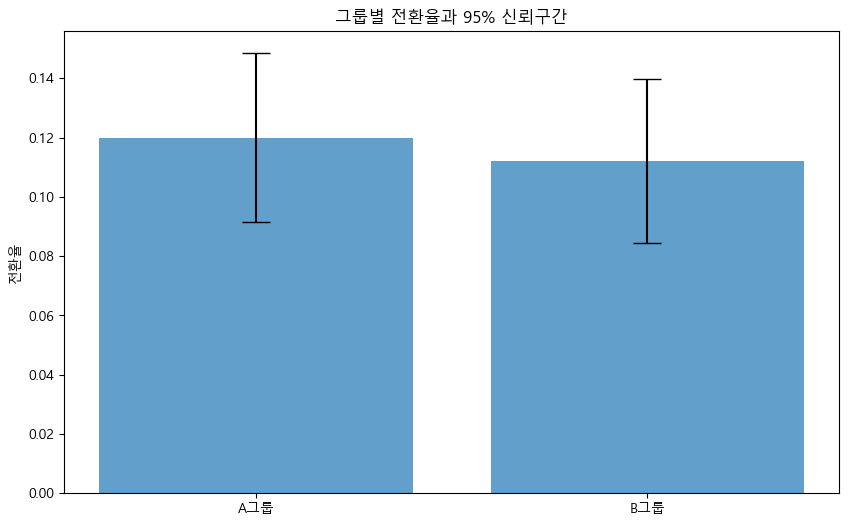

In [9]:
# TODO: 그래프 그리기
plt.figure(figsize=(10, 6))

# TODO: 그룹명과 전환율 리스트 만들기
groups = ['A그룹', 'B그룹']
rates = [p_a, p_b]

# TODO: 오차막대 크기 계산 (z_score * 표준오차)
errors = z_score * se_a, z_score * se_b

# TODO: 막대그래프 그리기
# 힌트: plt.bar(x, height, yerr=오차막대, capsize=10, alpha=0.7)
plt.bar(groups, rates, yerr=errors, capsize=10, alpha=0.7 )  # 빈칸을 채우세요

plt.ylabel('전환율')
plt.title('그룹별 전환율과 95% 신뢰구간')
plt.show()


### ✅ **문제 1-5: 전환율 차이 계산하기** 📊

**🤔 해야할 일:** B그룹이 A그룹보다 얼마나 더 좋은지 계산해보세요.

In [11]:
# TODO: 전환율 차이 계산 (B - A)
diff = p_b - p_a

# TODO: 차이의 표준오차 계산
# 힌트: 두 독립 비율 차이의 표준오차는 sqrt(se_a^2 + se_b^2)
se_diff = np.sqrt(se_a*se_a + se_b*se_b)

print(f"전환율 차이 (B-A): {diff:.3f}")
print(f"차이의 표준오차: {se_diff:.3f}")


전환율 차이 (B-A): -0.008
차이의 표준오차: 0.020


### ✅ **문제 1-6: 차이의 신뢰구간 계산하기** 🎯

**🤔 해야할 일:** 전환율 차이의 95% 신뢰구간을 계산해보세요.

In [ ]:
# TODO: 차이의 신뢰구간 하한 계산
ci_diff_lower = diff - 1.96 * se_diff

# TODO: 차이의 신뢰구간 상한 계산
ci_diff_upper = diff + 1.96 * se_diff

print(f"전환율 차이의 95% 신뢰구간: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

# TODO: 0이 포함되는지 확인하기
if ci_diff_lower > 0:
    print("🎉 B가 A보다 확실히 좋습니다!")
elif ci_diff_upper < 0:
    print("😢 A가 B보다 확실히 좋습니다.")
else:
    print("🤔 확실하지 않습니다.")

# 해석논리

# 신뢰구간이 0보다 크면:
# → B가 유의미하게 더 좋음 (양의 차이가 유의미)

# 신뢰구간이 0보다 작으면:
# → A가 더 좋음

# 0을 포함하면:
# → 차이가 통계적으로 유의하지 않음
# (즉, 우연일 가능성도 있음)




전환율 차이의 95% 신뢰구간: [-0.048, 0.032]
🤔 확실하지 않습니다.


In [ ]:
# +  p-value (양측 검정)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f'p_value: {p_value}')

# 해석
alpha = 0.05
if p_value < alpha:
    print("✅ 통계적으로 유의한 차이 있음 (전환율 차이 유효)")
else:
    print("🤔 유의한 차이라고 보기 어려움 (우연일 가능성 있음)")

p_value: 0.04999579029644097
✅ 통계적으로 유의한 차이 있음 (전환율 차이 유효)


### ✅ **문제 1-7: 경영진 보고서 작성하기** 💼

**🤔 해야할 일:** 분석 결과를 정리해서 보고서를 만들어보세요.

In [17]:
# TODO: 보고서 완성하기
print("📋 경영진 보고서")
print("="*50)
print(f"🔍 분석 결과:")
print(f"   • A그룹 전환율: {p_a:.1%}")
print(f"   • B그룹 전환율: {p_b:.1%}")
print(f"   • 개선 효과: {diff:.1%}p")
print()
print(f"📊 통계적 신뢰도:")
print(f"   • 개선 효과 범위: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("💡 의사결정:")

# TODO: if문을 사용해서 권장사항 작성하기
# 힌트: ci_diff_lower > 0이면 새 디자인 도입 권장
if ci_diff_lower > 0: # 조건을 작성하세요:
    print("   ✅ 새 디자인(B) 도입을 권장합니다!")
else:
    print("   ❌ 추가 데이터 수집이 필요합니다.")


📋 경영진 보고서
🔍 분석 결과:
   • A그룹 전환율: 12.0%
   • B그룹 전환율: 11.2%
   • 개선 효과: -0.8%p

📊 통계적 신뢰도:
   • 개선 효과 범위: -4.8%p ~ 3.2%p

💡 의사결정:
   ❌ 추가 데이터 수집이 필요합니다.
